In [2]:
import matplotlib.pyplot as plt
from pylab import *
import networkx as nx
import random as rd
import numpy as np

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < .5 else 0

def observe():
    global g
    plt.cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

def check_consensus():
    global g
    states = [i[1]['state'] for i in g.nodes.data()]
    density = sum(states)/len(states)
    if density == 1 or density == 0:
        return True
    return False    

In [3]:
res = []
for _ in range(1000):
    steps = 0
    initialize()
    while not check_consensus():
        update()
        steps += 1
    res.append(steps)

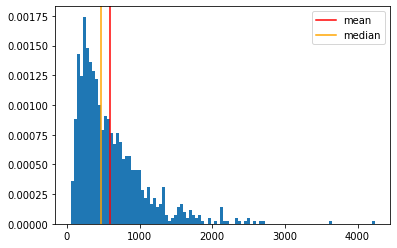

In [9]:
plt.hist(res, density=True, bins=100)
plt.axvline(np.mean(res), label='mean', c='red')
plt.axvline(np.median(res), label='median', c='orange')
plt.legend()
plt.show()

In [23]:
def update_rev():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']



def update_edge():
    global g
    edge = rd.choice(list(g.edges))
    ind = round(rd.random())
    speaker = edge[ind]
    listener = edge[1-ind]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

In [24]:
res = []
for _ in range(1000):
    steps = 0
    initialize()
    while not check_consensus():
        update_rev()
        steps += 1
    res.append(steps)

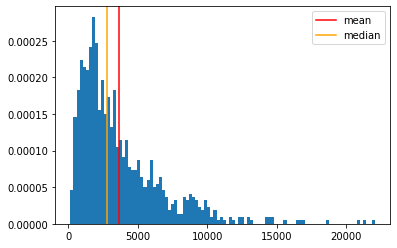

In [25]:
plt.hist(res, density=True, bins=100)
plt.axvline(np.mean(res), label='mean', c='red')
plt.axvline(np.median(res), label='median', c='orange')
plt.legend()
plt.show()

In [28]:
res = []
for _ in range(1000):
    steps = 0
    initialize()
    while not check_consensus():
        update_edge()
        steps += 1
    res.append(steps)

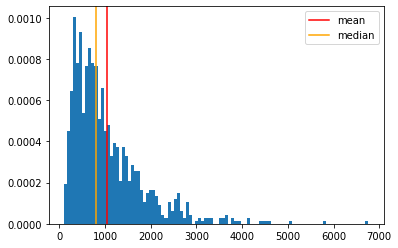

In [29]:
plt.hist(res, density=True, bins=100)
plt.axvline(np.mean(res), label='mean', c='red')
plt.axvline(np.median(res), label='median', c='orange')
plt.legend()
plt.show()